## LEAD SCORING CASE STUDY

### Problem Statement

The purpose of this  case study is to provide a comprehensive research and build a logistic regression model which can help X education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

The case study aims to assign lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


### Step 1: Reading and Understanding the Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
wrn.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [36]:
## Load the data
df=pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [37]:
# Describe the Data
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [38]:
## Check the shape of the data
df.shape

(9240, 37)

In [39]:
## Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2. Data Prepration and Data Handling

In [40]:
# Check the column wise null %
round(100*df.isnull().sum()/len(df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [41]:
### Dropping columns having more than 45 % null values

dr_col=df.columns[df.isnull().sum()/len(df) > 0.45]
dr_col

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [42]:
df.drop(columns=dr_col, axis=1,inplace=True)

In [43]:
# Check row wise null %

set(round(100*df.isnull().sum(axis=1)/37,2))

{0.0, 2.7, 5.41, 8.11, 10.81, 13.51, 16.22, 18.92, 21.62, 24.32, 27.03}

In [44]:
### Check for categorical values in columns
for i in df.columns:
    if len(df[i].unique()) < 50:
        print(i,df[i].unique(),len(df[i].unique()))
        print('\n')

Lead Origin ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form'] 5


Lead Source ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM'] 22


Do Not Email ['No' 'Yes'] 2


Do Not Call ['No' 'Yes'] 2


Converted [0 1] 2


TotalVisits [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.] 42


Last Activity ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SM

In [45]:
### Check for categorical columns having less than 2 categories
for i in df.columns:
    if len(df[i].unique()) < 2:
        print(i,df[i].unique(),len(df[i].unique()))
        print('\n')

Magazine ['No'] 1


Receive More Updates About Our Courses ['No'] 1


Update me on Supply Chain Content ['No'] 1


Get updates on DM Content ['No'] 1


I agree to pay the amount through cheque ['No'] 1




In [46]:
### Dropping columns with only one category
df_drop=['I agree to pay the amount through cheque','Get updates on DM Content','Magazine','Update me on Supply Chain Content','Receive More Updates About Our Courses']
df.drop(columns=df_drop,axis=1,inplace=True)
df.shape

(9240, 27)

In [47]:
### Check for categorries having Select as label
li=[]
for i in df.columns:
    if 'Select' in  df[i].unique():
        print(i,df[i].unique(),len(df[i].unique()))
        print('\n')
        li.append(i)
        #####df[i]=df[i].apply(lambda x: 'Not Available' if x=='Select' else x )
print(li)        

Specialization ['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business'] 20


How did you hear about X Education ['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS'] 11


Lead Profile ['Select' 'Potential Lead' nan 'Other Leads' 'Lateral Student'
 'Dual Specialization Student' 'Student of SomeSchool'] 7


City ['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities'] 8


['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

In [48]:
#### Lets Check column % having select as a category
for i in li:
    print('Select % in column',i,round((df[df[i]=='Select'][i].value_counts()*100/df.shape[0])[0],2))
    print('Null % in column',i,round(100*df[i].isnull().sum()/df.shape[0],2))
    print('Total % of missing vales',round((df[df[i]=='Select'][i].value_counts()*100/df.shape[0])[0],2)
         +round(100*df[i].isnull().sum()/df.shape[0],2)
         )
    print('\n')

Select % in column Specialization 21.02
Null % in column Specialization 15.56
Total % of missing vales 36.58


Select % in column How did you hear about X Education 54.58
Null % in column How did you hear about X Education 23.89
Total % of missing vales 78.47


Select % in column Lead Profile 44.87
Null % in column Lead Profile 29.32
Total % of missing vales 74.19


Select % in column City 24.34
Null % in column City 15.37
Total % of missing vales 39.71




In [49]:
### dropping columns How did you hear about X Education','Lead Profile' since it has  missing values more than 45
 
df.drop(columns=['How did you hear about X Education','Lead Profile'],axis=1,inplace=True)
df.shape

(9240, 25)

In [50]:
#### Creating seperate category for City and Specialization as not available for select values
df['City']=df['City'].apply(lambda x: 'Not Available' if x=='Select' else x )
df['Specialization']=df['Specialization'].apply(lambda x: 'Not Available' if x=='Select' else x )

In [51]:
#### Check the missing % count
round((100*df.isnull().sum()/df.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [52]:
###columns having null values
df_null=df[df.columns[round(100*df.isnull().sum()/len(df),2) > 0]]
df_null

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City
0,Olark Chat,0.0,0.00,Page Visited on Website,NaN,Not Available,Unemployed,Better Career Prospects,Interested in other courses,Not Available
1,Organic Search,5.0,2.50,Email Opened,India,Not Available,Unemployed,Better Career Prospects,Ringing,Not Available
2,Direct Traffic,2.0,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai
3,Direct Traffic,1.0,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai
4,Google,2.0,1.00,Converted to Lead,India,Not Available,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9235,Direct Traffic,8.0,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai
9236,Direct Traffic,2.0,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,wrong number given,Mumbai
9237,Direct Traffic,2.0,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,invalid number,Mumbai
9238,Google,3.0,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,NaN,Other Metro Cities


In [53]:
def box_plt(df, x):
    plt.figure(figsize=[8,6])
    #plt.title(label='',font_dict={'fontsize':30,'fontweight':30,'color':'Green'})
   
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty) 
    plt.style.use(sty[0])
    plt.tight_layout()
    plt.title(label='Outlier Analysis for '+x , fontdict={'fontsize':20 ,'fontweight':20 ,'color':'Green'})
    sns.boxplot(data=df,y=x)
    plt.xlabel(xlabel=x,fontdict={'fontsize':15 ,'fontweight':15 ,'color':'Green'})
    #plt.ylabel(ylabel='',font_dict={'fontsize':15,'fontweight':15,'color':'Green'})
    plt.show()
  

Number of missing values 137
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
50%         2.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


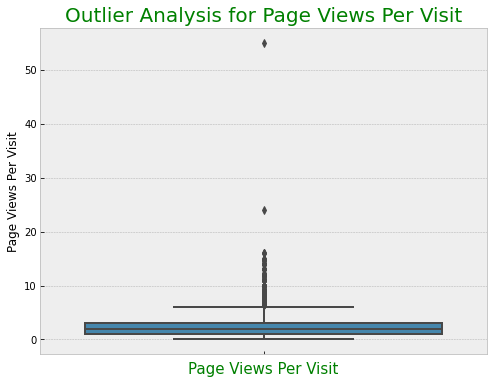

In [54]:
### Analyze column Page Views Per Visit

print('Number of missing values',df['Page Views Per Visit'].isnull().sum())
print(df['Page Views Per Visit'].describe(percentiles=[0.99,.95,0.9]))

box_plt(df,'Page Views Per Visit') 


#### Inference from the above plot
1. There are Extreme outliers in the column after 20
2. Outliers are continous from 5 to 16

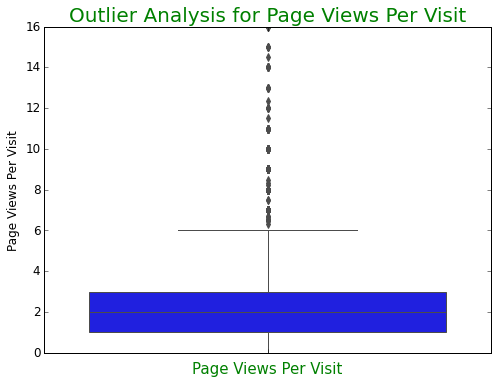

In [55]:
#### Droping records having Page view per visit more than 20
df=df[~(df['Page Views Per Visit'] > 20)]

df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())
df['Page Views Per Visit'].isnull().sum()
box_plt(df,'Page Views Per Visit') 

#### Inference from the above plot
1. After removing outlier we can observe the median is at 2
2. There are no extreme outliers in the data

Missing value count 137
count    9101.000000
mean        3.437315
std         4.820395
min         0.000000
50%         3.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


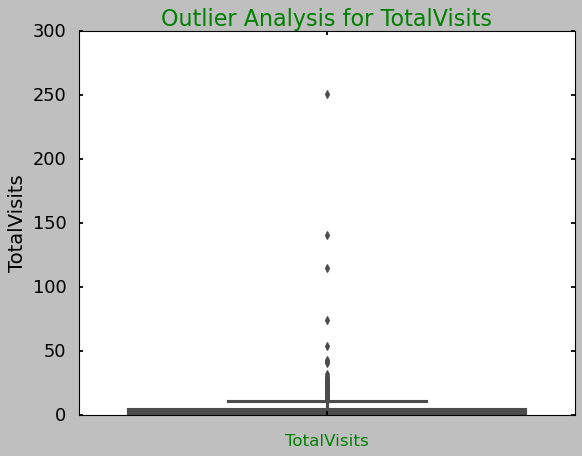

In [56]:
#### Analyze column TotalVisits
print('Missing value count',df['TotalVisits'].isnull().sum())
print(df['TotalVisits'].describe(percentiles=[0.99,.95,0.9]))
box_plt(df,'TotalVisits') 

#### Inference from the above plot
1. There are Extreme outliers in the column after 50
2. Outliers are continous from 17 to 30

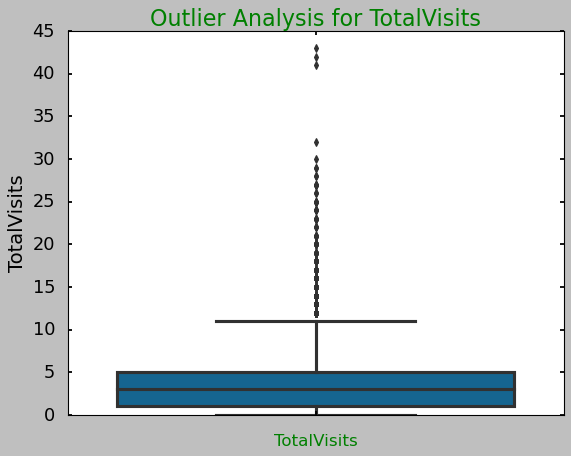

In [57]:
#### Droping records having TotalVisits more than 70
df=df[~(df['TotalVisits'] > 50)]

df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())
df['TotalVisits'].isnull().sum()
box_plt(df,'TotalVisits') 

#### Inference from the above plot
1. There are no extreme outliers in the data
2. outliers are continous

In [58]:
def dis_plt(df,x):
    plt.figure(figsize=[8,6])
    plt.title(label='Distribution  of Leads in '+x,fontdict={'fontsize':15,'fontweight':30,'color':'Blue'})
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty)
    plt.style.use(sty[0])
    plt.tight_layout()
    sns.countplot(data=df,x=x) 
    plt.xlabel(xlabel=x,fontdict={'fontsize':15,'fontweight':15,'color':'Blue'})
    plt.xticks(rotation=90)
    
    plt.show()
    
def cat_analysis(df,col):
    print('Missing value count',df[col].isnull().sum())
   ### print('\n')
    print('Mode value ',df[col].mode()[0])
    print('\n')
    print('Count of various categories in the column')
  ####  print('\n')
    print(df[col].value_counts())
        


In [59]:
#### Analyze column What is your current occupation


cat_analysis(df,'What is your current occupation')


Missing value count 2687
Mode value  Unemployed


Count of various categories in the column
Unemployed              5596
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


In [60]:
##### Lets impute the missing values in What is your current occupation to Not available
df['What is your current occupation']=df['What is your current occupation'].fillna('Not available')
df['What is your current occupation'].isnull().sum()

0

In [61]:
### Lets group the housewife , Student , Businesman into Others categories

def occupation_grp(x):
    if x=='Unemployed':
        return 'Unemployed'
    elif x=='Working Professional':
        return 'Working Professional'
    elif x=='Not available':
        return 'Not available'
    else:
        return 'Others'
df['What is your current occupation']=df['What is your current occupation'].apply(occupation_grp)  
df['What is your current occupation'].value_counts()

Unemployed              5596
Not available           2687
Working Professional     706
Others                   244
Name: What is your current occupation, dtype: int64

In [62]:
#### Lets analyze column What matters most to you in choosing a course

cat_analysis(df,'What matters most to you in choosing a course')

Missing value count 2705
Mode value  Better Career Prospects


Count of various categories in the column
Better Career Prospects      6525
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [63]:
##### Lets impute the missing values in What is your current occupation to Not available
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('Not available')
df['What matters most to you in choosing a course'].isnull().sum()

0

In [64]:
#### Lets analyze column Tags

cat_analysis(df,'Tags')

Missing value count 3348
Mode value  Will revert after reading the email


Count of various categories in the column
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           512
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           144
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not pr

In [65]:
### Droping columns Tags since the no of missing values is higher than the mode of the column and the number of categories more than 20 
df.drop(columns='Tags',axis=1,inplace=True)

In [66]:
### Lets analyze city column
cat_analysis(df,'City')

Missing value count 1419
Mode value  Mumbai


Count of various categories in the column
Mumbai                         3218
Not Available                  2249
Thane & Outskirts               751
Other Cities                    685
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


In [67]:
##### Lets impute the missing values in City to Not available
df['City']=df['City'].fillna('Not Available')
df['City'].isnull().sum()

0

In [68]:
#### Lets analyze the country column
cat_analysis(df,'Country')


Missing value count 2461
Mode value  India


Count of various categories in the column
India                   6486
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
South Africa               4
unknown                    4
Sweden                     3
Philippines                2
Ghana                      2
Italy                      2
Uganda                     2
Netherlands                2
Belgium                    2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Switzerland                1
Kenya                      1
Malaysia                   1
Russia        

In [70]:
#### Impute the missing value into new categories as Not available
df['Country'].fillna('Not available',inplace=True)
print(df['Country'].isnull().sum())

0


In [71]:
#### From the country column we can observe most of the leads are from India and leads from other countries are quiet minimun
def country_categories(x):
    if x=='India':
        return 'India'
    elif x=='Not available':
        return 'Not available'
    else:
        return 'Ouside India'
    
df['Country']=df['Country'].apply(country_categories)    
df['Country'].value_counts()    
        

India            6486
Not available    2461
Ouside India      286
Name: Country, dtype: int64

In [72]:
### Lets analyze the Lead source column

cat_analysis(df,'Lead Source')

Missing value count 36
Mode value  Google


Count of various categories in the column
Google               2868
Direct Traffic       2539
Olark Chat           1755
Organic Search       1153
Reference             534
Welingak Website      142
Referral Sites        123
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
Pay per Click Ads       1
testone                 1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64


In [73]:
#### Imputing the missing value in lead source column selecting mode method to impute
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)
print(df['Lead Source'].isnull().sum())

0


In [74]:
#### Categorizing smaller categories to others in the lead source column

def lead_cat(x):
    if x=='Google':
        return 'Google'
    elif x=='Direct Traffic':
        return 'Direct Traffic'
    elif x=='Olark Chat':
        return 'Olark Chat'
    elif x=='Organic Search':
        return 'Organic Search'
    else:
        return 'Others'
df['Lead Source']=df['Lead Source'].apply(lead_cat)
df['Lead Source'].value_counts()

Google            2904
Direct Traffic    2539
Olark Chat        1755
Organic Search    1153
Others             882
Name: Lead Source, dtype: int64

In [75]:
### Lets analyze the Specialization column


cat_analysis(df,'Specialization')    
  

Missing value count 1437
Mode value  Not Available


Count of various categories in the column
Not Available                        1940
Finance Management                    976
Human Resource Management             847
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                365
Supply Chain Management               348
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [76]:
df['Specialization'].fillna('Not Available',inplace=True)
print(df['Specialization'].isnull().sum())

0


In [77]:
### Lets analyze column Last Activity
cat_analysis(df,'Last Activity')

Missing value count 103
Mode value  Email Opened


Count of various categories in the column
Email Opened                    3437
SMS Sent                        2744
Olark Chat Conversation          973
Page Visited on Website          634
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


In [78]:
### Lets impute the missing value to mode of the column
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)
print(df['Last Activity'].isnull().sum())

0


In [79]:
### Lets check the null count

df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [80]:
### Shape of the dataframe after dropping and imputing missing values
df.shape

(9233, 24)

In [81]:
### Check data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9233 non-null   object 
 1   Lead Number                                    9233 non-null   int64  
 2   Lead Origin                                    9233 non-null   object 
 3   Lead Source                                    9233 non-null   object 
 4   Do Not Email                                   9233 non-null   object 
 5   Do Not Call                                    9233 non-null   object 
 6   Converted                                      9233 non-null   int64  
 7   TotalVisits                                    9233 non-null   float64
 8   Total Time Spent on Website                    9233 non-null   int64  
 9   Page Views Per Visit                           9233 

### 3. Exploratory Data Analysis

#### 3.1  Analysis of Binary Categorical variables with Target variable (Converted)

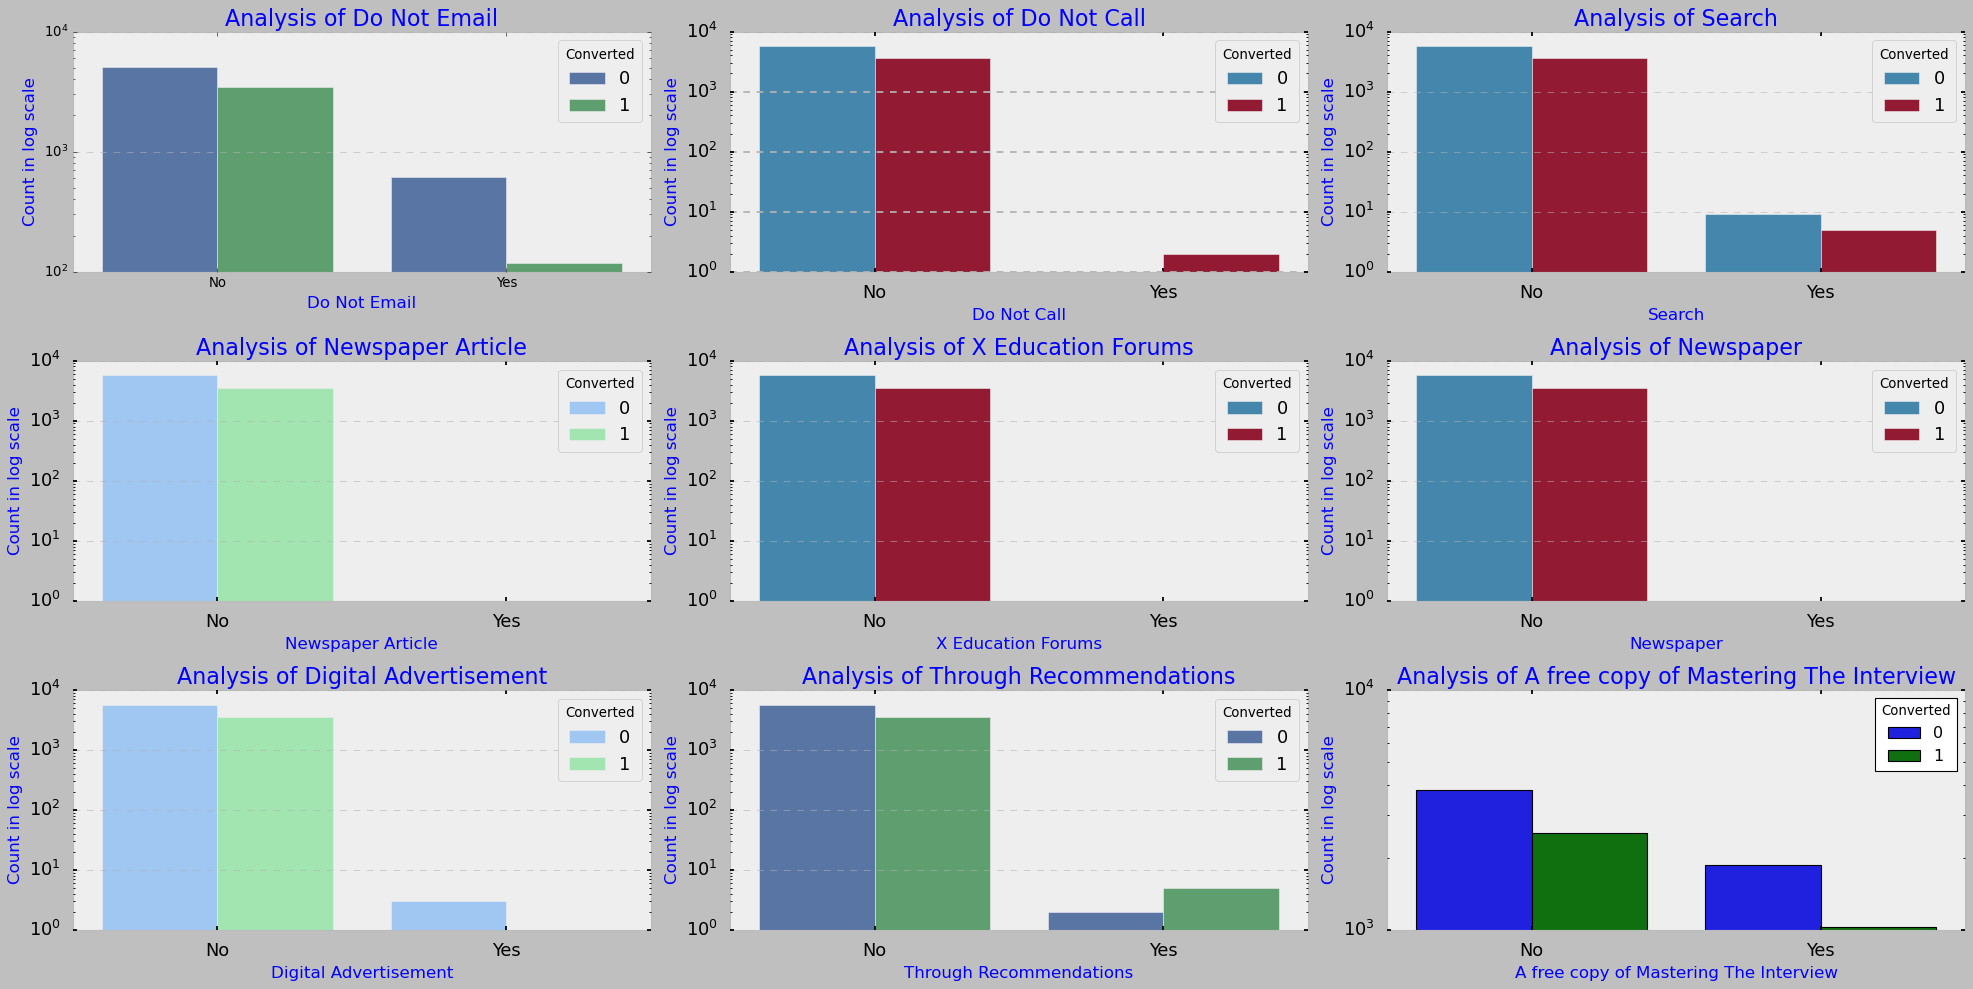

In [85]:
### Analysis of binary categorical variables

lis=['Do Not Email', 'Do Not Call',  'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']
plt.figure(figsize=[25,16])
i=1
for var in lis:
    
    plt.subplot(4,3,i)
    plt.title(label='Analysis of '+var ,fontdict={'fontsize':20,'fontweight':20,'color':'Blue'})
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty) 
    plt.style.use(sty[0])
    plt.tight_layout()
    plt.yscale('log')
    sns.countplot(data=df,x=var,hue='Converted')
    plt.xlabel(xlabel=var,fontdict={'fontsize':15,'fontweight':15,'color':'Blue'})
    plt.ylabel(ylabel='Count in log scale',fontdict={'fontsize':15,'fontweight':15,'color':'Blue'})
    i=i+1

#### Inference from the above plot
1. Most of the converted leads prefer to receive Email about the course
2. Both converted and non converted leads do not prefer to recive Calls
3. Both converted and non converted leads have not found Seen the Ad through Search
4. Both leads have not seen the add through Newspaper Article
5. Both leads have not seen the Ad through X education forums
6. Both leads have not seen the Ad  through Newspaper
7. Both leads have not seen the Ad through Digital Advertisement, very few non converted leads have seen the Ad through Digital Advertizement
8. We can Observe most of the Converted Leads are from Non recomendation, we can also observe the conversion of leads through recomendation is higher then non converted leads
9. Most of the converted leads do not prefer copy of mastering the interview, whearas Non converted leads prefer a copy

#### 3.2 Analysis of Categorical Variables with Target variable (Converted)

<Figure size 2000x1280 with 0 Axes>

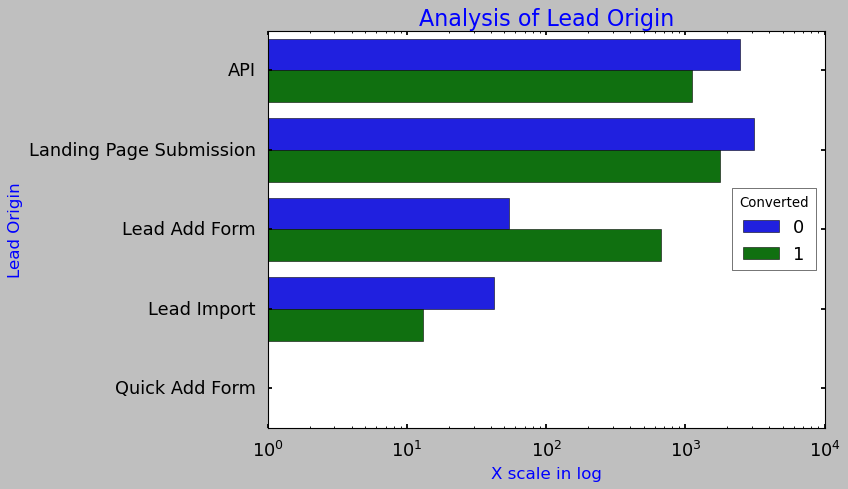

In [87]:
#### Analysis of categorical variables

lis=[ 'Lead Origin', 'Lead Source',  'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 
 'What matters most to you in choosing a course', 'City', 'Last Notable Activity']
plt.figure(figsize=[25,16])
i=1
def count_plt(df,var):
    plt.figure(figsize=[8,6])
    ####plt.subplot(5,2,i)
    plt.title(label='Analysis of '+var ,fontdict={'fontsize':20,'fontweight':20,'color':'Blue'})
    sty=['bmh','seaborn-deep', 'seaborn-pastel', 'classic',  'seaborn-poster',  'tableau-colorblind10', 'seaborn-bright']
    np.random.shuffle(sty) 
    plt.style.use(sty[0])
    plt.tight_layout()
    sns.countplot(data=df,y=var,hue='Converted')
    plt.xscale('log')
    plt.xlabel(xlabel='X scale in log',fontdict={'fontsize':15,'fontweight':15,'color':'Blue'})
    plt.ylabel(ylabel=var,fontdict={'fontsize':15,'fontweight':15,'color':'Blue'})
    plt.show()
    ###plt.yticks(rotation)
    ####i=i+1
count_plt(df,lis[0])    

#### Inference from the above plot
1. Lead Add form has high converted lead, when compared to non converted lead for the same.
2. Landing page submission has the highest converted lead across all converted lead source.


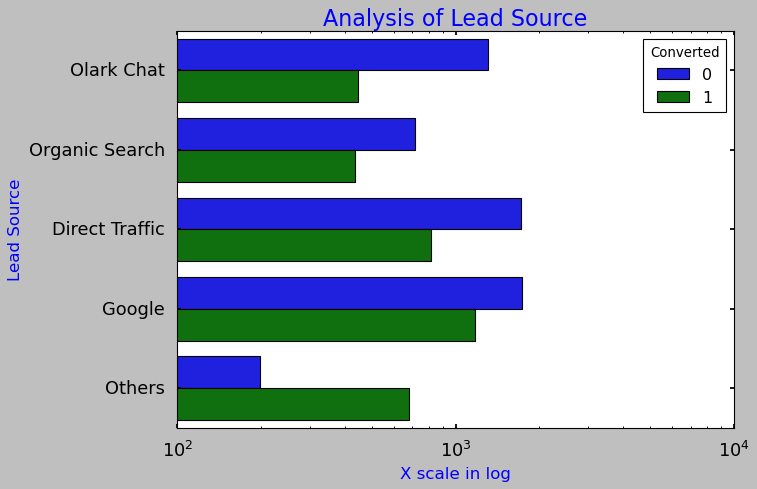

In [88]:
count_plt(df,lis[1])    

#### Inference from the above plot
1. Lead Source through Google has the highest converted leads
2. Lead Source through Direct Traffic has the highest non convertead leads 

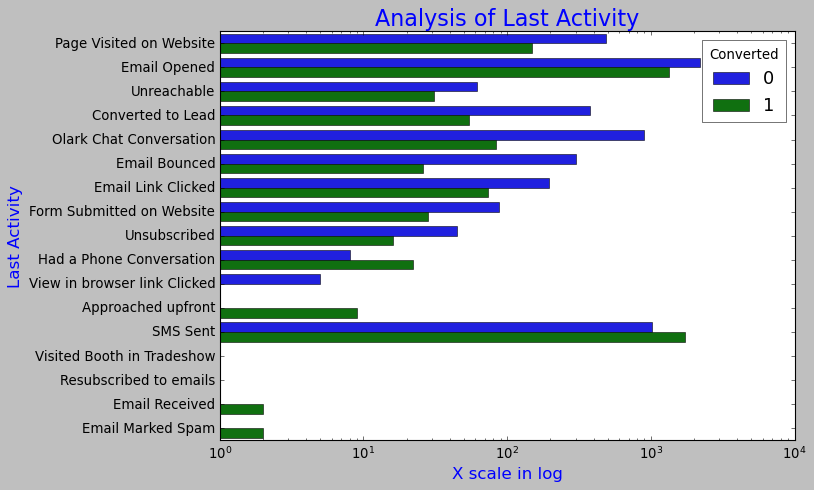

In [89]:
count_plt(df,lis[2])  

#### Inference from the above plot
1. Converted leads have the Last activity as Sent SMS
2. Non convertead leads are higher with last activity as Email opened
3. Last activity as had a phone conversation has high converted lead when compare to non converted leads

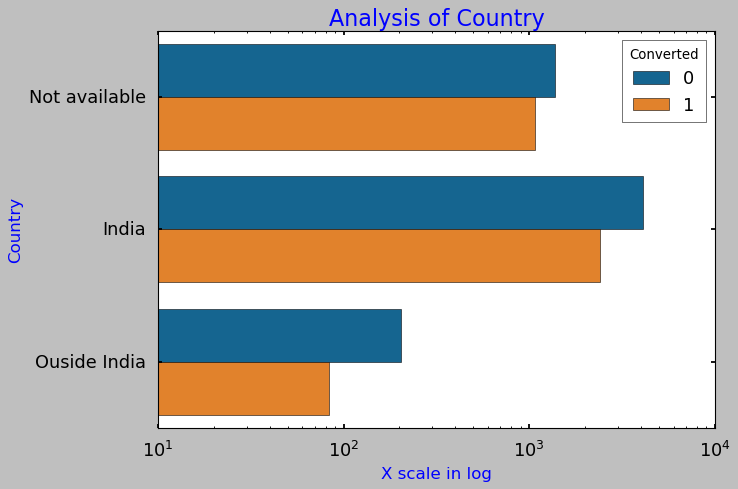

In [90]:
count_plt(df,lis[3])  

#### Inference from the above plot
1. Country as India has the highest convertead leads 
2. Convertead leads are least for outside India.

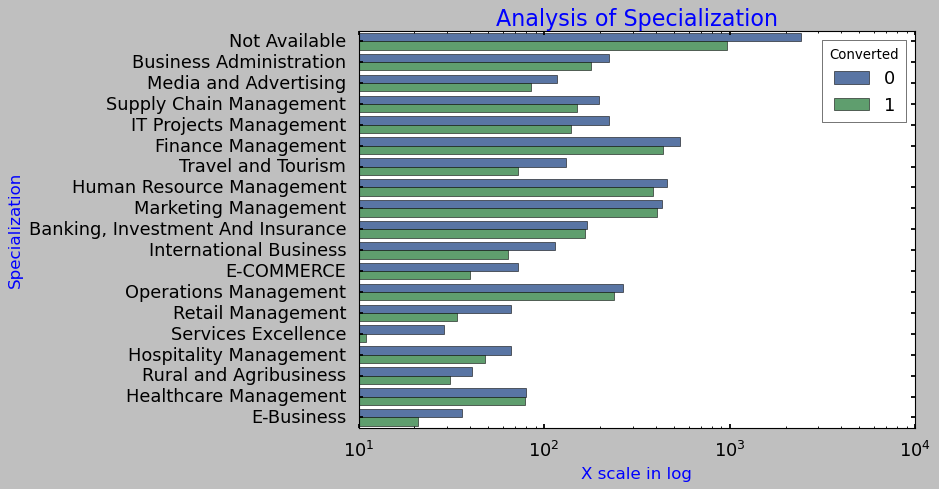

In [91]:
count_plt(df,lis[4])  

#### Inference from the above plot
1. Convertead leads are maximum where Specialization is not specified.
2. Specializtion such as Service Excellence, E-Business and Rural and Agribusiness has the least convertead leads
3. Finance Management Specializtion has the highest convertead leads among specified specilization

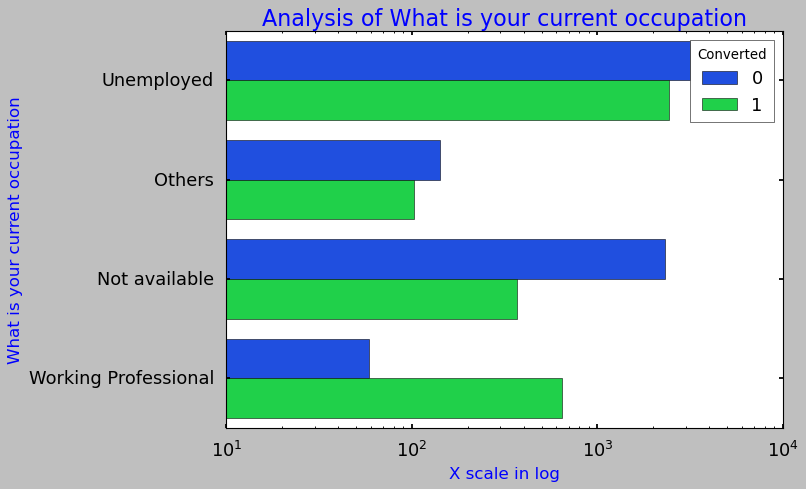

In [92]:


count_plt(df,lis[5])  

### Inference from the above plot
1. Unemployed leads have the highest lead conversion count.
2. Working proffesional have highe lead conversion percentage

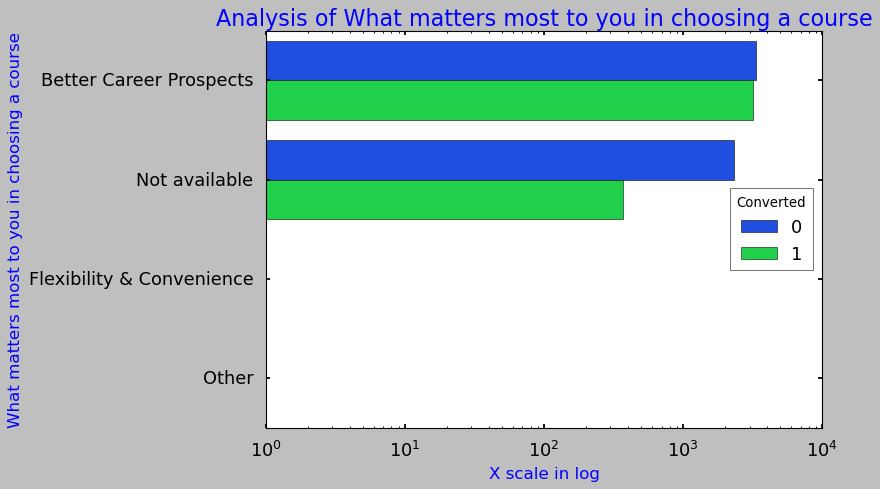

In [93]:
count_plt(df,lis[6])  

#### Inference from the above plot
1. Both converted and non converted leads have the purpose as Better career prospect for enrolling into the course

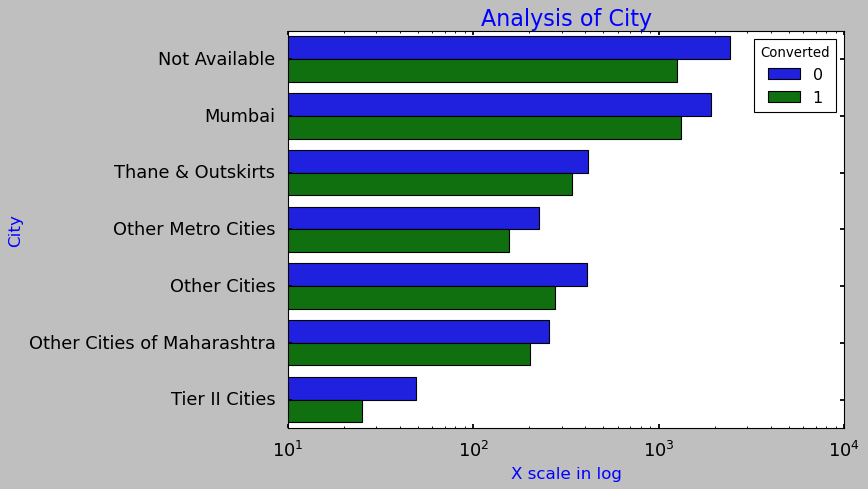

In [94]:
count_plt(df,lis[7])  

#### Inference from the above plot
1. Mumbai has the highest Converted leads
2. Tier 2 cities have the least converted leads

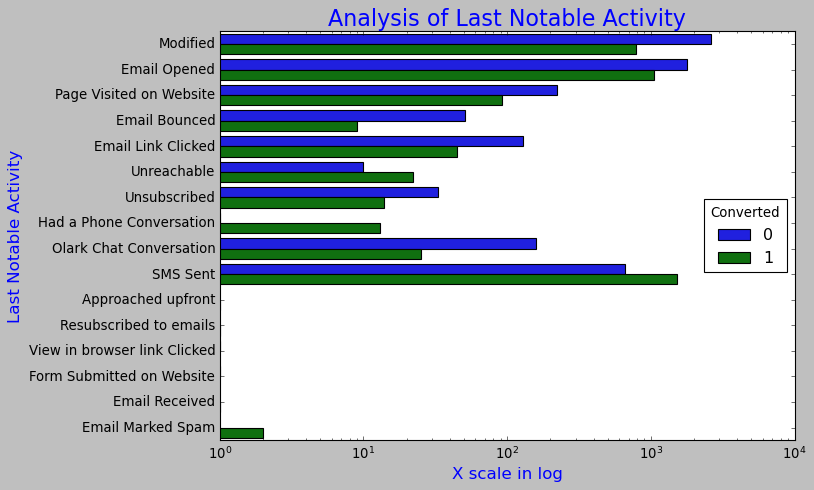

In [95]:
count_plt(df,lis[8])  

#### Inference from the above plot
1. Converted leads with last notable activity as SMS sent has highest number of leads.
2. Last notable activity as Modified has the highest number of non converted customer.

#### 3.3 Analysis of numerical variables

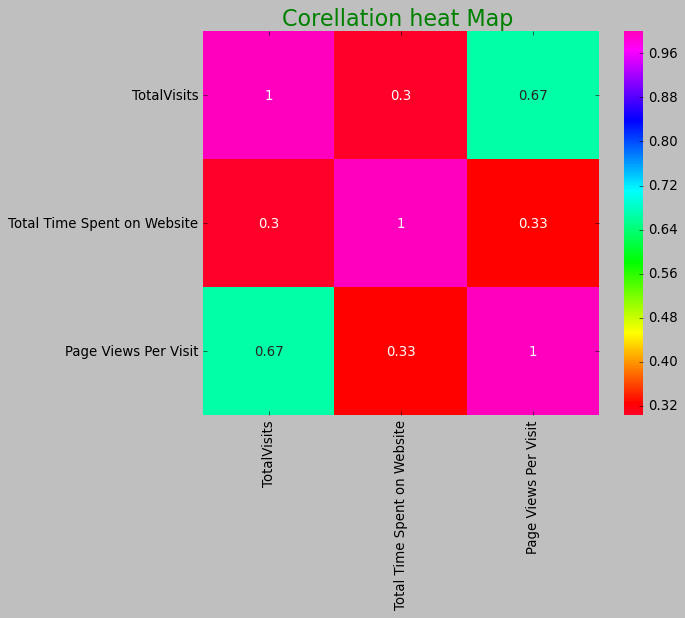

In [96]:
df_cor=df[['TotalVisits', 'Total Time Spent on Website',
 'Page Views Per Visit',]].corr()
plt.figure(figsize=[8,6])
sns.heatmap(df_cor,annot=True,cmap='gist_rainbow')
plt.title(label='Corellation heat Map ',fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Inference from the above plot
1. Total visit and Page view per visit have the highest corelation.
2. Total time spen on website has weak corelation with Total visit and page view per visit

##### Droping columns not helpful for model building
 
1. 'Last Activity', 'Last Notable Activity' are Sales team field and not required for the analysis
2. 'What matters most to you in choosing a course'  is a skewd column     
3. 'Prospect ID','Lead Number' are variables used to identify records

In [97]:

lis=['Prospect ID','Lead Number','Last Activity','What matters most to you in choosing a course','Last Notable Activity']
df.columns

df_1=df.drop(columns=lis,axis=1)


In [98]:

df_1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Not available,Not Available,Unemployed,No,No,No,No,No,No,Not Available,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Not Available,Unemployed,No,No,No,No,No,No,Not Available,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Others,No,No,No,No,No,No,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Not Available,Unemployed,No,No,No,No,No,No,Mumbai,No


In [99]:
### Dummifying categorical variable variable
dum_var=[ 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call',  
       'Country', 'Specialization', 'What is your current occupation',
        'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview']
for col in dum_var:
    dummy=pd.get_dummies(df_1[col],drop_first=True,prefix=col)
    df_1=pd.concat([df_1,dummy],axis=1)
    df_1.drop([col],axis=1,inplace=True)
df_1.head()



,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Do Not Call_Yes,Country_Not available,Country_Ouside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
## Check shape of the data

df_1.shape

(9233, 50)

In [101]:
## check info of the data
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9233 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9233 non-null   int64  
 1   TotalVisits                                           9233 non-null   float64
 2   Total Time Spent on Website                           9233 non-null   int64  
 3   Page Views Per Visit                                  9233 non-null   float64
 4   Lead Origin_Landing Page Submission                   9233 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9233 non-null   uint8  
 6   Lead Origin_Lead Import                               9233 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9233 non-null   uint8  
 8   Lead Source_Google                                    9233

###  4. Spliting the data into testing and training the dataset 

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
####Spliting the data into traning and test data set
X=df_1.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Do Not Call_Yes,Country_Not available,Country_Ouside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
y=df_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [105]:
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [106]:
#Scaling of Numerical variables

from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler=MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Do Not Call_Yes,Country_Not available,Country_Ouside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
1032,0.139535,0.606074,0.37500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6535,0.116279,0.196303,0.15625,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6238,0.000000,0.000000,0.00000,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3190,0.093023,0.704225,0.25000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
712,0.023256,0.066461,0.06250,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


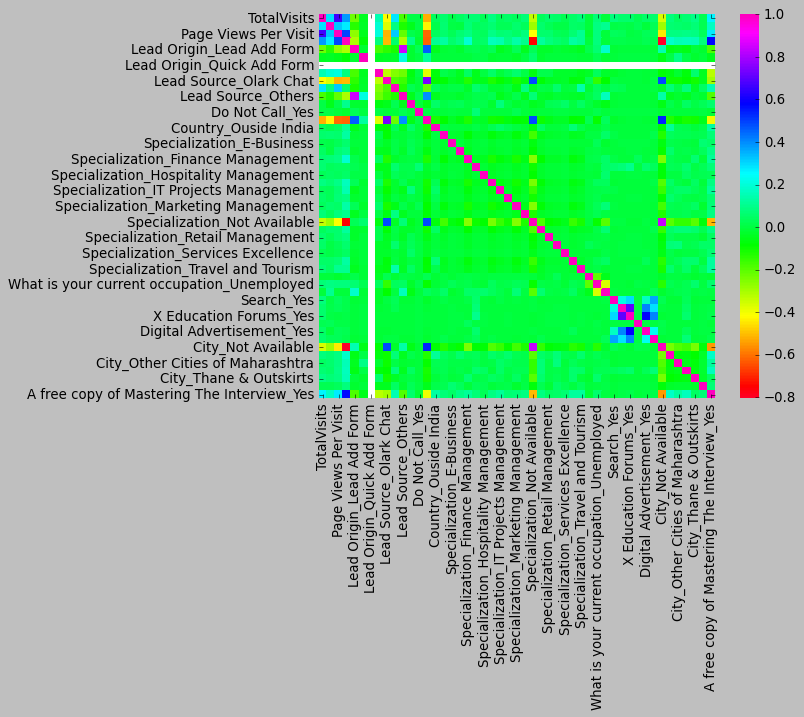

In [108]:
#### Check the corelation between variables

sns.heatmap(X_train.corr(),cmap='gist_rainbow')
plt.show()

#### Inference from the above plot
1. From the plot we can observe most of the variables have weak or no co relation
2. total visit and page view per visit are strongly co related

### 5. Building the Model

In [109]:
from sklearn.linear_model import LogisticRegression
### Intialize the model
log_reg=LogisticRegression()


In [110]:
from sklearn.feature_selection import RFE
### use RFE to select top 20 variables
rfe = RFE(log_reg, 20)

#### Fit the model to training Data

rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Others', False, 26),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 11),
 ('Country_Not available', True, 1),
 ('Country_Ouside India', False, 18),
 ('Specialization_Business Administration', False, 14),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', False, 5),
 ('Specialization_Finance Management', False, 28),
 ('Specialization_Healthcare Management', False, 29),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 10),
 ('Specialization_IT Projects Management', False, 22),
 ('Specializati

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Do Not Email_Yes', 'Country_Not available',
       'Specialization_E-Business', 'Specialization_Hospitality Management',
       'Specialization_Not Available', 'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Newspaper Article_Yes', 'Newspaper_Yes', 'Digital Advertisement_Yes',
       'City_Not Available'],
      dtype='object')

In [113]:
X_train = X_train[col]

In [114]:
import statsmodels.api as sm

###### Trail 1

In [115]:
## Adding a constant
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2853.0
Date:                Mon, 14 Jun 2021   Deviance:                       5706.0
Time:                        20:32:16   Pearson chi2:                 8.13e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9757      0.166    -11.919      0.000      -2.301      -1.651
TotalVisits                                              1.9927      0.525      3.795      0.000       0.964       3.022
Total Time Spent on Website                              4.5498      0.162     28.090      0.000       4.232       4.867
Page Views Per Visit                                    -0.7244      0.373     -1.941      0.052      -1.456       0.007
Lead Origin_Landing Page Submission                     -1.0301      0.131     -7.870      0.000      -1.287      -0.774
Lead Origin_Lead Add Form                                2.6048      0.191     13.672      0.000       2.231       2.978
Lead Origin_Lead Import                                 -1.9189      0.547     -3.511      0.000      -2.990      -0.848
Do Not Email_Yes                                        -1.3487      0.160     -8.423      0.000      -1.663      -1.035
Country_Not available                                    1.0429      0.125      8.338      0.000       0.798       1.288
Specialization_E-Business                               -0.5625      0.449     -1.254      0.210      -1.442       0.317
Specialization_Hospitality Management                   -0.8191      0.327     -2.505      0.012      -1.460      -0.178
Specialization_Not Available                            -0.6422      0.150     -4.283      0.000      -0.936      -0.348
Specialization_Retail Management                        -0.3651      0.319     -1.144      0.253      -0.991       0.261
Specialization_Services Excellence                      -0.5011      0.572     -0.876      0.381      -1.622       0.620
What is your current occupation_Others                   1.2883      0.207      6.217      0.000       0.882       1.694
What is your current occupation_Unemployed               1.2319      0.085     14.543      0.000       1.066       1.398
What is your current occupation_Working Professional     3.5734      0.191     18.694      0.000       3.199       3.948
Newspaper Article_Yes                                   21.8591   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Newspaper_Yes                                          -24.1794   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Digital Advertisement_Yes                              -42.2081   2.98e+04     -0.001      0.999   -5.84e+04    5.84e+04
City_Not Available                                      -0.5540      0.163     -3.409      0.001      -0.873      -0.235
========================================================================================================================
"""

##### p-value of  Newspaper_Yes is very high and hence dropping the variable and re creating the model

In [116]:
X_train.drop('Newspaper_Yes', axis = 1, inplace = True)

#### Trail 2

In [117]:
### Adding constant and recreating the model
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.8
Date:                Mon, 14 Jun 2021   Deviance:                       5709.5
Time:                        20:32:20   Pearson chi2:                 8.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9626      0.166    -11.850      0.000      -2.287      -1.638
TotalVisits                                              1.9598      0.525      3.734      0.000       0.931       2.989
Total Time Spent on Website                              4.5396      0.162     28.060      0.000       4.223       4.857
Page Views Per Visit                                    -0.7122      0.373     -1.909      0.056      -1.443       0.019
Lead Origin_Landing Page Submission                     -1.0394      0.131     -7.943      0.000      -1.296      -0.783
Lead Origin_Lead Add Form                                2.6041      0.191     13.669      0.000       2.231       2.978
Lead Origin_Lead Import                                 -1.9337      0.546     -3.540      0.000      -3.004      -0.863
Do Not Email_Yes                                        -1.3466      0.160     -8.413      0.000      -1.660      -1.033
Country_Not available                                    1.0403      0.125      8.319      0.000       0.795       1.285
Specialization_E-Business                               -0.5615      0.448     -1.252      0.210      -1.440       0.317
Specialization_Hospitality Management                   -0.8164      0.327     -2.498      0.013      -1.457      -0.176
Specialization_Not Available                            -0.6298      0.150     -4.206      0.000      -0.923      -0.336
Specialization_Retail Management                        -0.3634      0.319     -1.139      0.255      -0.989       0.262
Specialization_Services Excellence                      -0.5016      0.572     -0.877      0.380      -1.622       0.619
What is your current occupation_Others                   1.2871      0.207      6.214      0.000       0.881       1.693
What is your current occupation_Unemployed               1.2302      0.085     14.528      0.000       1.064       1.396
What is your current occupation_Working Professional     3.5739      0.191     18.705      0.000       3.199       3.948
Newspaper Article_Yes                                   21.8699   2.11e+04      0.001      0.999   -4.12e+04    4.13e+04
Digital Advertisement_Yes                              -42.2047   2.98e+04     -0.001      0.999   -5.84e+04    5.83e+04
City_Not Available                                      -0.5760      0.162     -3.550      0.000      -0.894      -0.258
========================================================================================================================
"""

In [118]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,City_Not Available,7.47
10,Specialization_Not Available,6.65
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.80
0,TotalVisits,3.55
7,Country_Not available,3.04
14,What is your current occupation_Unemployed,2.92
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
15,What is your current occupation_Working Profes...,1.48


#### p-value of  Digital Advertisement_Yes is very high and hence dropping the variable and re creating the model

In [120]:
X_train.drop('Digital Advertisement_Yes', axis = 1, inplace = True)

#### Trail 3

In [121]:

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.5
Date:                Mon, 14 Jun 2021   Deviance:                       5713.1
Time:                        20:32:25   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9728      0.165    -11.935      0.000      -2.297      -1.649
TotalVisits                                              1.9038      0.524      3.633      0.000       0.877       2.931
Total Time Spent on Website                              4.5415      0.162     28.072      0.000       4.224       4.859
Page Views Per Visit                                    -0.6729      0.372     -1.810      0.070      -1.402       0.056
Lead Origin_Landing Page Submission                     -1.0358      0.131     -7.927      0.000      -1.292      -0.780
Lead Origin_Lead Add Form                                2.6040      0.190     13.671      0.000       2.231       2.977
Lead Origin_Lead Import                                 -1.9324      0.546     -3.538      0.000      -3.003      -0.862
Do Not Email_Yes                                        -1.3460      0.160     -8.410      0.000      -1.660      -1.032
Country_Not available                                    1.0410      0.125      8.326      0.000       0.796       1.286
Specialization_E-Business                               -0.5615      0.448     -1.252      0.211      -1.441       0.318
Specialization_Hospitality Management                   -0.8153      0.327     -2.494      0.013      -1.456      -0.175
Specialization_Not Available                            -0.6240      0.150     -4.172      0.000      -0.917      -0.331
Specialization_Retail Management                        -0.3627      0.319     -1.136      0.256      -0.988       0.263
Specialization_Services Excellence                      -0.4997      0.572     -0.874      0.382      -1.621       0.621
What is your current occupation_Others                   1.2910      0.207      6.234      0.000       0.885       1.697
What is your current occupation_Unemployed               1.2343      0.085     14.576      0.000       1.068       1.400
What is your current occupation_Working Professional     3.5779      0.191     18.727      0.000       3.203       3.952
Newspaper Article_Yes                                    0.7725      1.426      0.542      0.588      -2.023       3.567
City_Not Available                                      -0.5743      0.162     -3.546      0.000      -0.892      -0.257
========================================================================================================================
"""

In [122]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,City_Not Available,7.46
10,Specialization_Not Available,6.64
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.80
0,TotalVisits,3.55
7,Country_Not available,3.04
14,What is your current occupation_Unemployed,2.92
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
15,What is your current occupation_Working Profes...,1.48


####  p-value of  Newspaper Article_Yes is very high and hence dropping the variable and re creating the model

In [123]:
X_train.drop('Newspaper Article_Yes', axis = 1, inplace = True)

#### Trail 4

In [124]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.7
Date:                Mon, 14 Jun 2021   Deviance:                       5713.4
Time:                        20:32:29   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9767      0.165    -11.967      0.000      -2.300      -1.653
TotalVisits                                              1.9228      0.523      3.677      0.000       0.898       2.948
Total Time Spent on Website                              4.5421      0.162     28.076      0.000       4.225       4.859
Page Views Per Visit                                    -0.6735      0.372     -1.811      0.070      -1.402       0.055
Lead Origin_Landing Page Submission                     -1.0328      0.131     -7.912      0.000      -1.289      -0.777
Lead Origin_Lead Add Form                                2.6048      0.190     13.676      0.000       2.231       2.978
Lead Origin_Lead Import                                 -1.9307      0.546     -3.535      0.000      -3.001      -0.860
Do Not Email_Yes                                        -1.3466      0.160     -8.414      0.000      -1.660      -1.033
Country_Not available                                    1.0422      0.125      8.336      0.000       0.797       1.287
Specialization_E-Business                               -0.5617      0.448     -1.252      0.210      -1.441       0.317
Specialization_Hospitality Management                   -0.8158      0.327     -2.496      0.013      -1.456      -0.175
Specialization_Not Available                            -0.6228      0.150     -4.164      0.000      -0.916      -0.330
Specialization_Retail Management                        -0.3632      0.319     -1.138      0.255      -0.989       0.262
Specialization_Services Excellence                      -0.4998      0.572     -0.874      0.382      -1.621       0.621
What is your current occupation_Others                   1.2902      0.207      6.230      0.000       0.884       1.696
What is your current occupation_Unemployed               1.2336      0.085     14.572      0.000       1.068       1.400
What is your current occupation_Working Professional     3.5773      0.191     18.724      0.000       3.203       3.952
City_Not Available                                      -0.5721      0.162     -3.534      0.000      -0.889      -0.255
========================================================================================================================
"""

In [125]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,City_Not Available,7.46
10,Specialization_Not Available,6.64
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.80
0,TotalVisits,3.54
7,Country_Not available,3.04
14,What is your current occupation_Unemployed,2.91
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
15,What is your current occupation_Working Profes...,1.48


#### p-value of  Specialization_Services Excellence is very high and hence dropping the variable and re creating the model

In [126]:
X_train.drop('Specialization_Services Excellence', axis = 1, inplace = True)

#### Trail 5

In [127]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.1
Date:                Mon, 14 Jun 2021   Deviance:                       5714.2
Time:                        20:32:33   Pearson chi2:                 8.10e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9820      0.165    -12.008      0.000      -2.306      -1.659
TotalVisits                                              1.9194      0.523      3.673      0.000       0.895       2.944
Total Time Spent on Website                              4.5427      0.162     28.084      0.000       4.226       4.860
Page Views Per Visit                                    -0.6730      0.372     -1.811      0.070      -1.401       0.055
Lead Origin_Landing Page Submission                     -1.0306      0.130     -7.900      0.000      -1.286      -0.775
Lead Origin_Lead Add Form                                2.6066      0.190     13.685      0.000       2.233       2.980
Lead Origin_Lead Import                                 -1.9267      0.546     -3.528      0.000      -2.997      -0.856
Do Not Email_Yes                                        -1.3518      0.160     -8.452      0.000      -1.665      -1.038
Country_Not available                                    1.0417      0.125      8.333      0.000       0.797       1.287
Specialization_E-Business                               -0.5588      0.449     -1.246      0.213      -1.438       0.320
Specialization_Hospitality Management                   -0.8127      0.327     -2.486      0.013      -1.453      -0.172
Specialization_Not Available                            -0.6211      0.150     -4.154      0.000      -0.914      -0.328
Specialization_Retail Management                        -0.3602      0.319     -1.129      0.259      -0.986       0.265
What is your current occupation_Others                   1.2927      0.207      6.243      0.000       0.887       1.699
What is your current occupation_Unemployed               1.2344      0.085     14.585      0.000       1.069       1.400
What is your current occupation_Working Professional     3.5760      0.191     18.720      0.000       3.202       3.950
City_Not Available                                      -0.5686      0.162     -3.514      0.000      -0.886      -0.251
========================================================================================================================
"""

In [128]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,City_Not Available,7.46
10,Specialization_Not Available,6.64
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.79
0,TotalVisits,3.54
7,Country_Not available,3.04
13,What is your current occupation_Unemployed,2.91
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
14,What is your current occupation_Working Profes...,1.48


####  p-value of  Specialization_Retail Management is very high and hence dropping the variable and re creating the model

In [129]:


X_train.drop('Specialization_Retail Management', axis = 1, inplace = True)

#### Trail 6

In [130]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.7
Date:                Mon, 14 Jun 2021   Deviance:                       5715.5
Time:                        20:32:37   Pearson chi2:                 8.11e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9863      0.165    -12.037      0.000      -2.310      -1.663
TotalVisits                                              1.9174      0.521      3.681      0.000       0.896       2.938
Total Time Spent on Website                              4.5396      0.162     28.076      0.000       4.223       4.856
Page Views Per Visit                                    -0.6797      0.371     -1.831      0.067      -1.407       0.048
Lead Origin_Landing Page Submission                     -1.0308      0.130     -7.904      0.000      -1.286      -0.775
Lead Origin_Lead Add Form                                2.6072      0.190     13.688      0.000       2.234       2.980
Lead Origin_Lead Import                                 -1.9231      0.546     -3.523      0.000      -2.993      -0.853
Do Not Email_Yes                                        -1.3524      0.160     -8.462      0.000      -1.666      -1.039
Country_Not available                                    1.0399      0.125      8.320      0.000       0.795       1.285
Specialization_E-Business                               -0.5523      0.448     -1.232      0.218      -1.431       0.327
Specialization_Hospitality Management                   -0.8057      0.327     -2.466      0.014      -1.446      -0.165
Specialization_Not Available                            -0.6167      0.149     -4.126      0.000      -0.910      -0.324
What is your current occupation_Others                   1.2945      0.207      6.256      0.000       0.889       1.700
What is your current occupation_Unemployed               1.2351      0.085     14.592      0.000       1.069       1.401
What is your current occupation_Working Professional     3.5746      0.191     18.717      0.000       3.200       3.949
City_Not Available                                      -0.5672      0.162     -3.508      0.000      -0.884      -0.250
========================================================================================================================
"""

In [131]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
####  X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

,Features,VIF
14,City_Not Available,7.46
10,Specialization_Not Available,6.64
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.79
0,TotalVisits,3.53
7,Country_Not available,3.04
12,What is your current occupation_Unemployed,2.91
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
13,What is your current occupation_Working Profes...,1.48


####  p-value of  Specialization_E-Business is very high and hence dropping the variable and re creating the model

In [132]:

X_train.drop('Specialization_E-Business', axis = 1, inplace = True)

#### Trail 7

In [133]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.5
Date:                Mon, 14 Jun 2021   Deviance:                       5717.1
Time:                        20:32:41   Pearson chi2:                 8.12e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9904      0.165    -12.065      0.000      -2.314      -1.667
TotalVisits                                              1.9289      0.521      3.705      0.000       0.908       2.949
Total Time Spent on Website                              4.5386      0.162     28.080      0.000       4.222       4.855
Page Views Per Visit                                    -0.6820      0.371     -1.837      0.066      -1.410       0.046
Lead Origin_Landing Page Submission                     -1.0332      0.130     -7.925      0.000      -1.289      -0.778
Lead Origin_Lead Add Form                                2.6062      0.190     13.682      0.000       2.233       2.980
Lead Origin_Lead Import                                 -1.9211      0.546     -3.519      0.000      -2.991      -0.851
Do Not Email_Yes                                        -1.3545      0.160     -8.480      0.000      -1.668      -1.041
Country_Not available                                    1.0403      0.125      8.323      0.000       0.795       1.285
Specialization_Hospitality Management                   -0.8011      0.327     -2.451      0.014      -1.442      -0.161
Specialization_Not Available                            -0.6151      0.149     -4.115      0.000      -0.908      -0.322
What is your current occupation_Others                   1.2981      0.207      6.274      0.000       0.893       1.704
What is your current occupation_Unemployed               1.2353      0.085     14.593      0.000       1.069       1.401
What is your current occupation_Working Professional     3.5793      0.191     18.745      0.000       3.205       3.954
City_Not Available                                      -0.5650      0.162     -3.494      0.000      -0.882      -0.248
========================================================================================================================
"""

In [134]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
####  X_train.drop('What is your current occupation_Unemployed', axis = 1, inplace = True)

,Features,VIF
13,City_Not Available,7.46
9,Specialization_Not Available,6.64
2,Page Views Per Visit,4.96
3,Lead Origin_Landing Page Submission,3.78
0,TotalVisits,3.53
7,Country_Not available,3.04
11,What is your current occupation_Unemployed,2.91
1,Total Time Spent on Website,2.18
4,Lead Origin_Lead Add Form,1.65
12,What is your current occupation_Working Profes...,1.48


####  p-value for all variable are within limit dropping City_Not Available as it has  very high VIF value and hence dropping the variable and re creating the model

In [135]:
X_train.drop('City_Not Available', axis = 1, inplace = True)

#### Trail 8

In [136]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6463
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2864.7
Date:                Mon, 14 Jun 2021   Deviance:                       5729.3
Time:                        20:32:46   Pearson chi2:                 8.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1890      0.155    -14.167      0.000      -2.492      -1.886
TotalVisits                                              2.0227      0.519      3.897      0.000       1.005       3.040
Total Time Spent on Website                              4.5293      0.161     28.087      0.000       4.213       4.845
Page Views Per Visit                                    -0.7094      0.371     -1.913      0.056      -1.436       0.017
Lead Origin_Landing Page Submission                     -0.8422      0.117     -7.176      0.000      -1.072      -0.612
Lead Origin_Lead Add Form                                2.6376      0.190     13.871      0.000       2.265       3.010
Lead Origin_Lead Import                                 -1.4922      0.535     -2.791      0.005      -2.540      -0.444
Do Not Email_Yes                                        -1.3683      0.160     -8.577      0.000      -1.681      -1.056
Country_Not available                                    1.0073      0.124      8.106      0.000       0.764       1.251
Specialization_Hospitality Management                   -0.8048      0.326     -2.469      0.014      -1.444      -0.166
Specialization_Not Available                            -0.9440      0.118     -8.016      0.000      -1.175      -0.713
What is your current occupation_Others                   1.3213      0.207      6.391      0.000       0.916       1.727
What is your current occupation_Unemployed               1.2396      0.085     14.659      0.000       1.074       1.405
What is your current occupation_Working Professional     3.5508      0.192     18.513      0.000       3.175       3.927
========================================================================================================================
"""

In [137]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
####  X_train.drop('Country_Not available', axis = 1, inplace = True)

,Features,VIF
2,Page Views Per Visit,4.90
3,Lead Origin_Landing Page Submission,3.57
0,TotalVisits,3.53
11,What is your current occupation_Unemployed,2.87
7,Country_Not available,2.85
9,Specialization_Not Available,2.50
1,Total Time Spent on Website,2.17
4,Lead Origin_Lead Add Form,1.65
12,What is your current occupation_Working Profes...,1.36
6,Do Not Email_Yes,1.11


#### All p-values and vif are within the range

###  6. Creating Prediction

In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1032    0.725063
6535    0.314725
6238    0.852133
3190    0.787025
712     0.169432
3942    0.628247
6808    0.106618
9206    0.699133
4683    0.173616
4333    0.234393
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72506289, 0.31472487, 0.85213306, 0.78702465, 0.16943211,
       0.62824718, 0.10661803, 0.69913259, 0.17361616, 0.23439338])

In [140]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.725063
1,0,0.314725
2,1,0.852133
3,1,0.787025
4,0,0.169432


In [141]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.725063,1
1,0,0.314725,0
2,1,0.852133,1
3,1,0.787025,1
4,0,0.169432,0


In [142]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [143]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3531,  440],
       [ 790, 1702]], dtype=int64)

In [148]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8096859043787714

In [149]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [150]:
# Calculating the sensitivity
TP/(TP+FN)

0.6829855537720706

In [151]:
# Calculating the specificity
TN/(TN+FP)

0.889196675900277

### Plotting ROC Curve

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

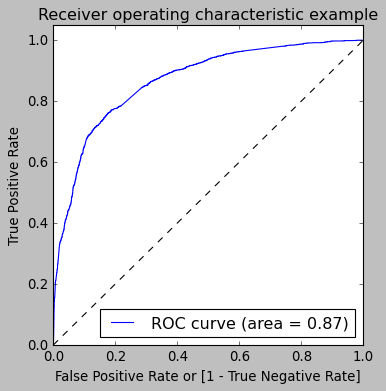

In [154]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Inference from the above plot
1. ROC curve has high value of 0.87

In [155]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.725063,1,1,1,1,1,1,1,1,1,0,0
1,0,0.314725,0,1,1,1,1,0,0,0,0,0,0
2,1,0.852133,1,1,1,1,1,1,1,1,1,1,0
3,1,0.787025,1,1,1,1,1,1,1,1,1,0,0
4,0,0.169432,0,1,1,0,0,0,0,0,0,0,0


In [156]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
cutoff_df

,prob,accuracy,sensitivity,specificity


In [157]:
# Making confusing matrix to find values of sensitivity, accuracy and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    conf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(conf))
    accuracy = (conf[0,0]+conf[1,1])/total1
    
    speci = conf[0,0]/(conf[0,0]+conf[0,1])
    sensi = conf[1,1]/(conf[1,0]+conf[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.385579,1.000000,0.000000
0.1,0.1,0.536283,0.980337,0.257618
0.2,0.2,0.704162,0.907705,0.576429
0.3,0.3,0.785858,0.781701,0.788466
0.4,0.4,0.803033,0.725522,0.851675
0.5,0.5,0.809686,0.682986,0.889197
0.6,0.6,0.790654,0.588283,0.917653
0.7,0.7,0.765125,0.486758,0.939814
0.8,0.8,0.738202,0.373194,0.967263
0.9,0.9,0.697973,0.233146,0.989675


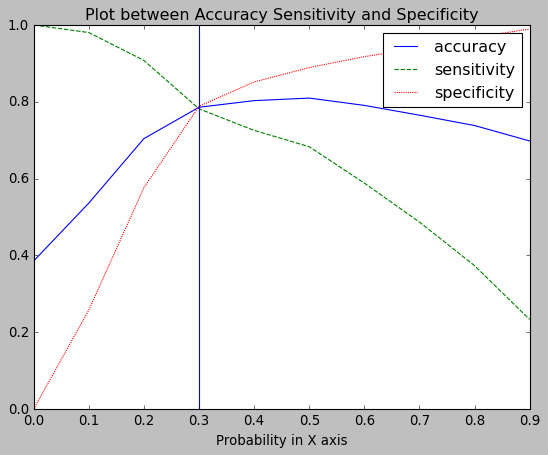

In [158]:
###cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.figure(figsize=[8,6])
plt.title(label='Plot between Accuracy Sensitivity and Specificity')
t=sns.lineplot(data=cutoff_df[['accuracy','sensitivity','specificity']])
plt.xlabel(xlabel='Probability in X axis')
t.axvline(0.3)
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [159]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.725063,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.314725,0,1,1,1,1,0,0,0,0,0,0,1
2,1,0.852133,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.787025,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.169432,0,1,1,0,0,0,0,0,0,0,0,0


In [160]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7858579606993656

In [164]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3131,  840],
       [ 544, 1948]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
def metrics_computation(confu):
    TP = confu[1,1] # true positive 
    TN = confu[0,0] # true negatives
    FP = confu[0,1] # false positives
    FN = confu[1,0] # false negatives
    print('Specificity',round((TN / float(TN+FP)),2))
    print('sensitivity',round((TP / float(TP+FN)),2))
    print('Positive_predictive_value',round((TP / float(TP+FP)),2))
    print('Negative_predictive_value',round((TN / float(TN+ FN)),2))
    print('Precision',round((TP / float(FP+ TP)),2))
    print('Recall',round((TP / float(TP+ FN)),2))
    
metrics_computation(confusion2)    

Specificity 0.79
sensitivity 0.78
Positive_predictive_value 0.7
Negative_predictive_value 0.85
Precision 0.7
Recall 0.78


### 7. Precision and Recall

In [167]:
# Precision = TP / TP + FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.6987087517934003

In [168]:
#Recall = TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.7817014446227929

#### 7.1  Precision and recall tradeoff

In [169]:
from sklearn.metrics import precision_recall_curve

In [170]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6458    1
 6459    1
 6460    0
 6461    0
 6462    0
 Name: Converted, Length: 6463, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6458    1
 6459    1
 6460    0
 6461    1
 6462    0
 Name: Predicted, Length: 6463, dtype: int64)

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

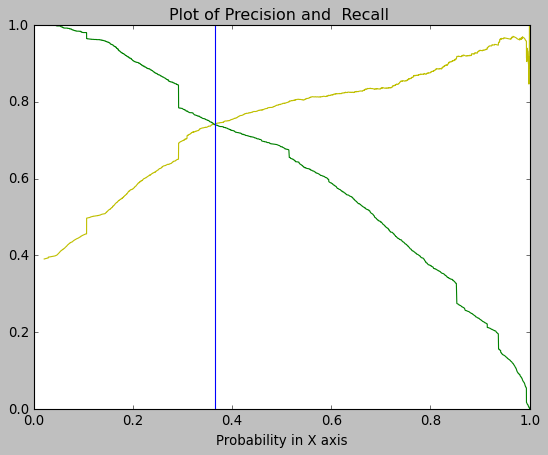

In [172]:
plt.figure(figsize=[8,6])
plt.title(label='Plot of Precision and  Recall ')
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "g-")
plt.axvline(0.365)
plt.xlabel(xlabel='Probability in X axis')
plt.show()

#### Cutoff for optimum precision and recall is 0.365

In [173]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.365 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.725063,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.314725,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.852133,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.787025,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.169432,0,1,1,0,0,0,0,0,0,0,0,0


In [174]:
# Accuracy
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.8

In [175]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3326,  645],
       [ 647, 1845]], dtype=int64)

In [176]:
metrics_computation(confusion3) 

Specificity 0.84
sensitivity 0.74
Positive_predictive_value 0.74
Negative_predictive_value 0.84
Precision 0.74
Recall 0.74


### 8. Prediction on Test Data

In [177]:
### Scaling the test dataframe

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Do Not Email_Yes,Do Not Call_Yes,Country_Not available,Country_Ouside India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes
4869,0.046512,0.581426,0.125000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8687,0.116279,0.636004,0.312500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3719,0.046512,0.063380,0.125000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3511,0.186047,0.446743,0.166875,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2508,0.116279,0.049296,0.312500,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [178]:
### Adding constant to train dataframe
X_test_sm = sm.add_constant(X_test[X_train.columns])

In [179]:

# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_test_pred

4869    0.959240
8687    0.750743
3719    0.167854
3511    0.320853
2508    0.174392
          ...   
7539    0.302830
3281    0.547569
8060    0.993351
987     0.181595
7415    0.163383
Length: 2770, dtype: float64

In [180]:
y_pred_final=pd.concat([y_test_pred,y_test],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Conversion_Prob,Converted
4869,0.959240,1
8687,0.750743,1
3719,0.167854,0
3511,0.320853,1
2508,0.174392,1


In [181]:
# Making prediction using cut off 0.365
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.365 else 0)
y_pred_final

,Conversion_Prob,Converted,final_predicted
4869,0.959240,1,1
8687,0.750743,1,1
3719,0.167854,0,0
3511,0.320853,1,0
2508,0.174392,1,0
...,...,...,...
7539,0.302830,1,0
3281,0.547569,0,1
8060,0.993351,1,1
987,0.181595,0,0


In [182]:
# Check the overall accuracy
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted),2)

0.81

In [183]:
# Creating confusion matrix 
confusion4 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion4

array([[1434,  269],
       [ 266,  801]], dtype=int64)

In [184]:
# Check performance parameter of test data
metrics_computation(confusion4)    

Specificity 0.84
sensitivity 0.75
Positive_predictive_value 0.75
Negative_predictive_value 0.84
Precision 0.75
Recall 0.75


### 9. Results and conclusion

####  Performance metrics of Train Data 

1. Accuracy	0.80
2. Specificity	0.84
3. sensitivity	0.74
4. Positive_predictive_value	0.74
5. Negative_predictive_value	0.84
6. Precision	0.74
7. Recall	0.74

####  Performance metrics of Test Data 

1. Accuracy	0.81
2. Specificity	0.84
3. sensitivity	0.75
4. Positive_predictive_value	0.75
5. Negative_predictive_value	0.84
6. Precision	0.75
7. Recall	0.75


### 9.1 Conclusion

###### We can suggest the below points to X Education to improve its conversion rate

1. Customer Spending more time have higher chance to enroll into the course
2. Working proffesional has hiher chance to enroll into the course and they needs to be targeted
3. Customer with Lead origin as Lead Add form are more likely to enroll the course
4. Customer who are not interested in receiving mails are less likely to enroll
5. Customer with No speciliztion or Speciliztion ad Hospitality and managemnt are less likely to join
6. Customer with Lead origin ad Landing page submission or Lead import are less likely to enroll
7. Cistomer with occupation as Unemployed or Others would be inteasted in joining the course